In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rh=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/RelativeHumidity/RelativeHumidity.csv")

In [3]:
rh

,Year,Month,RH_past,RH_pasttopast,RelativeHumidity
0,2002,1,35.76,28.38,39.29
1,2002,2,20.56,36.69,31.59
2,2002,3,29.99,22.29,24.67
3,2002,4,32.76,28.46,25.98
4,2002,5,43.92,51.01,47.20
...,...,...,...,...,...
211,2019,8,77.89,76.57,76.57
212,2019,9,70.89,79.02,79.02
213,2019,10,53.71,74.36,74.36
214,2019,11,45.54,64.33,64.33


In [4]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
Year                216 non-null int64
Month               216 non-null int64
RH_past             216 non-null float64
RH_pasttopast       216 non-null float64
RelativeHumidity    216 non-null float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [5]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=rh.corr()
corr_matrix

,Year,Month,RH_past,RH_pasttopast,RelativeHumidity
Year,1.000000,0.000000,-0.005030,0.027777,-0.008449
Month,0.000000,1.000000,0.615014,0.612535,0.620142
RH_past,-0.005030,0.615014,1.000000,0.934694,0.934155
RH_pasttopast,0.027777,0.612535,0.934694,1.000000,0.930002
RelativeHumidity,-0.008449,0.620142,0.934155,0.930002,1.000000


In [6]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

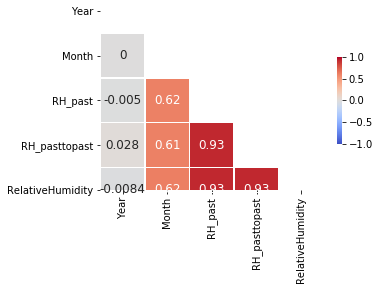

In [7]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [8]:
#rh=rh.drop(['Year'],axis=1)

In [9]:
rh.shape

(216, 5)

In [10]:
rh=rh.iloc[:,:].values

In [11]:
rh

array([[2.002e+03, 1.000e+00, 3.576e+01, 2.838e+01, 3.929e+01],
       [2.002e+03, 2.000e+00, 2.056e+01, 3.669e+01, 3.159e+01],
       [2.002e+03, 3.000e+00, 2.999e+01, 2.229e+01, 2.467e+01],
       ...,
       [2.019e+03, 1.000e+01, 5.371e+01, 7.436e+01, 7.436e+01],
       [2.019e+03, 1.100e+01, 4.554e+01, 6.433e+01, 6.433e+01],
       [2.019e+03, 1.200e+01, 4.015e+01, 5.653e+01, 5.653e+01]])

In [12]:
X=rh[:,:-1]
y=rh[:,-1]

In [13]:
X

array([[2.002e+03, 1.000e+00, 3.576e+01, 2.838e+01],
       [2.002e+03, 2.000e+00, 2.056e+01, 3.669e+01],
       [2.002e+03, 3.000e+00, 2.999e+01, 2.229e+01],
       [2.002e+03, 4.000e+00, 3.276e+01, 2.846e+01],
       [2.002e+03, 5.000e+00, 4.392e+01, 5.101e+01],
       [2.002e+03, 6.000e+00, 6.919e+01, 7.330e+01],
       [2.002e+03, 7.000e+00, 7.299e+01, 7.644e+01],
       [2.002e+03, 8.000e+00, 7.776e+01, 7.857e+01],
       [2.002e+03, 9.000e+00, 7.335e+01, 7.383e+01],
       [2.002e+03, 1.000e+01, 7.338e+01, 6.180e+01],
       [2.002e+03, 1.100e+01, 6.046e+01, 4.984e+01],
       [2.002e+03, 1.200e+01, 4.528e+01, 2.646e+01],
       [2.003e+03, 1.000e+00, 3.929e+01, 3.576e+01],
       [2.003e+03, 2.000e+00, 3.159e+01, 2.056e+01],
       [2.003e+03, 3.000e+00, 2.467e+01, 2.999e+01],
       [2.003e+03, 4.000e+00, 2.598e+01, 3.276e+01],
       [2.003e+03, 5.000e+00, 4.720e+01, 4.392e+01],
       [2.003e+03, 6.000e+00, 6.995e+01, 6.919e+01],
       [2.003e+03, 7.000e+00, 7.208e+01, 7.299

In [14]:
y

array([39.29, 31.59, 24.67, 25.98, 47.2 , 69.95, 72.08, 77.06, 71.8 ,
       59.76, 43.87, 33.28, 35.5 , 30.11, 25.15, 30.38, 34.68, 63.91,
       76.38, 76.33, 73.33, 61.74, 45.51, 36.3 , 36.93, 26.74, 20.29,
       29.45, 55.63, 73.61, 77.57, 79.64, 78.07, 69.02, 58.05, 39.85,
       34.46, 30.09, 27.  , 36.64, 41.53, 67.01, 81.09, 82.68, 83.19,
       74.77, 64.19, 54.8 , 40.48, 24.23, 32.29, 28.92, 43.67, 72.62,
       80.36, 82.96, 81.27, 73.6 , 72.62, 57.46, 42.78, 36.07, 25.52,
       27.2 , 40.92, 68.64, 79.14, 80.31, 82.35, 67.01, 58.13, 51.47,
       32.75, 31.06, 34.36, 30.77, 41.86, 70.96, 72.05, 79.05, 80.25,
       69.53, 63.44, 53.17, 38.27, 24.84, 24.82, 25.9 , 40.11, 65.12,
       77.68, 76.52, 76.66, 71.43, 70.59, 61.44, 52.23, 36.75, 26.13,
       28.21, 38.24, 70.68, 79.02, 81.75, 80.36, 75.68, 76.55, 61.55,
       43.57, 34.94, 22.64, 33.1 , 41.54, 71.74, 76.46, 79.18, 78.08,
       72.99, 58.35, 41.98, 36.63, 24.3 , 18.34, 29.48, 37.2 , 60.71,
       75.  , 75.54,

In [15]:
X.shape

(216, 4)

In [16]:
y.shape

(216,)

In [17]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [18]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [19]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

# Linear Regressor

In [20]:
li=LinearRegression()

In [21]:
li.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
Lir_ypred= li.predict(X_test)
Lir_ypred

array([47.57896148, 79.08377235, 73.23056512, 34.06805759, 29.84122879,
       68.53261962, 29.31568748, 79.88330956, 73.18607474, 73.94606353,
       70.7505581 , 76.00866071, 66.58673614, 34.86543145, 64.11356153,
       29.26459761, 37.07864452, 38.60419917, 78.39452173, 41.46139813,
       63.00236477, 68.32677626, 73.82908344, 34.80314214, 67.38518673,
       33.5377353 , 24.18435194, 47.47710541, 72.77967016, 74.30204834,
       61.964355  , 31.22992127, 76.49117381, 28.58236585, 30.86008084,
       75.98663113, 77.74058409, 26.79660541, 36.56616048, 27.67563244,
       58.15833258, 55.05198113, 52.77668847, 30.74909133])

In [23]:
Linear=pd.DataFrame({'Actual':y_test,'Predicted':Lir_ypred})
Linear

,Actual,Predicted
0,53.29,47.578961
1,79.14,79.083772
2,72.99,73.230565
3,52.23,34.068058
4,34.94,29.841229
5,71.43,68.532620
6,34.36,29.315687
7,82.96,79.883310
8,76.17,73.186075
9,79.02,73.946064


In [24]:
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 49.190889791575756
Root Mean Squared Error: 7.013621731429188
R2_Score: 0.8715929642807543


In [26]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.8715929642807543

# Lasso Regressor

In [27]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
Lass_ypred= lass.predict(X_test)

In [29]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 49.190607115332426
Root Mean Squared Error: 7.013601579454911
R2_Score: 0.8715937021738607


In [30]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.8715937021738607

# Ridge Regressor

In [31]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
rid_ypred= rid.predict(X_test)

In [33]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 49.190889391977954
Root Mean Squared Error: 7.013621702941923
R2_Score: 0.8715929653238574


In [34]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.8715929653238574

# Decision Tree Regressor

In [35]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [36]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [37]:
dt_ypred= dt.predict(X_test)

In [38]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 79.95388409090907
Root Mean Squared Error: 8.941693580687557
R2_Score: 0.7912897836600626


In [39]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.7912897836600626

# KNN Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=3)
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [41]:
kn1_pred=kn.predict(X_test)

In [42]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 49.113704797979786
Root Mean Squared Error: 7.008117065088153
R2_Score: 0.8717944466339229


In [43]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.8717944466339229

# SVR rbf

In [44]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 370.60690179846796
Root Mean Squared Error: 19.251153258921086
R2_Score: 0.0325742453801946


In [46]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

0.0325742453801946

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [49]:
rf_pred=rf.predict(X_test)

In [50]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 39.304944874736904
Root Mean Squared Error: 6.269365587899377
R2_Score: 0.8973990614551222


In [51]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8973990614551222

# Bayes Regressor

In [52]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)
y_pred=br.predict(X_test)

In [53]:
bay=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
bay

,Actual,Predicted
0,53.29,47.221719
1,79.14,79.176180
2,72.99,73.123517
3,52.23,34.343847
4,34.94,30.050749
5,71.43,68.388378
6,34.36,29.392406
7,82.96,79.921445
8,76.17,73.315369
9,79.02,73.944708


In [54]:
print('Mean squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score:',r2_score(y_test,y_pred))

Mean squared Error: 48.36218938110283
Root Mean Squared Error: 6.954292874268586
R2_Score: 0.8737561892937398


In [55]:
bayes_r2_score=r2_score(y_test,y_pred)
bayes_r2_score

0.8737561892937398

In [56]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

No handles with labels found to put in legend.


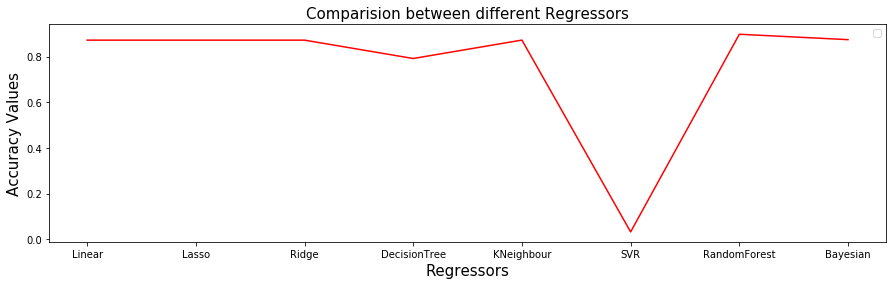

In [57]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


#  random forest is best for Relativehumidity prediction with accuracy of 89.73% followed by KNN with neighbour=3 87.17% 

In [58]:
rh2020=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/RelativeHumidity/Relativehumidity2020pred.csv")

In [59]:
#rh2020.drop(['Year'],axis=1,inplace=True)

In [60]:
rh2020=rh2020.iloc[:,:].values

In [61]:
rh2020

array([[2.020e+03, 1.000e+00, 3.485e+01, 4.052e+01],
       [2.020e+03, 2.000e+00, 2.443e+01, 2.910e+01],
       [2.020e+03, 3.000e+00, 2.549e+01, 2.673e+01],
       [2.020e+03, 4.000e+00, 2.409e+01, 2.618e+01],
       [2.020e+03, 5.000e+00, 3.806e+01, 3.815e+01],
       [2.020e+03, 6.000e+00, 6.979e+01, 7.242e+01],
       [2.020e+03, 7.000e+00, 7.617e+01, 7.764e+01],
       [2.020e+03, 8.000e+00, 7.657e+01, 7.789e+01],
       [2.020e+03, 9.000e+00, 7.902e+01, 7.089e+01],
       [2.020e+03, 1.000e+01, 7.436e+01, 5.371e+01],
       [2.020e+03, 1.100e+01, 6.433e+01, 4.554e+01],
       [2.020e+03, 1.200e+01, 5.653e+01, 4.015e+01]])

In [62]:
rh2020_pred=[]

In [63]:
rh2020_pred1=rf.predict(rh2020)

In [64]:
rh2020_pred1

array([36.74041, 28.18608, 24.9862 , 25.64483, 39.15415, 74.29077,
       76.24217, 75.63663, 71.70818, 54.11695, 51.37936, 48.47239])

In [65]:
rhum_data=pd.DataFrame(data=rh2020_pred1)
rhum_data

,0
0,36.74041
1,28.18608
2,24.98620
3,25.64483
4,39.15415
5,74.29077
6,76.24217
7,75.63663
8,71.70818
9,54.11695


In [66]:
rhum_data.to_csv(r"C:\Users\Abhishek Wagh\Desktop\MTech_Project\Sugarcane\Phase1\csv\RelativeHumidity\2020rhum.csv")